In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/lab6')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/lab6


In [2]:
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, # For Fully Connected layers
                                     Conv2D, # For Convolution
                                     Flatten, # To transform conv layers to fully connected
                                     MaxPooling2D, # Max pool
                                     BatchNormalization, # Normalize batch
                                     Dropout) # Randomly drop weights
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
import numpy as np

X_train = np.load(r'eurosat_X_train.npy')
X_test = np.load(r'eurosat_X_test.npy')
y_train = np.load(r'eurosat_y_train.npy')
y_test = np.load(r'eurosat_y_test.npy')

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1300, 224, 224, 3)
(558, 224, 224, 3)
(1300, 7)
(558, 7)


In [5]:
# Define parameters
width, height, channel = 224, 224, 3
classes = 7
batch_size = 64
learning_rate = 0.001
epochs = 10

In [6]:
vgg16 = VGG16(include_top=True, weights=None, input_shape=(width, height, channel), classes=classes)

In [7]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# Compile model using accuracy to measure model 
vgg16.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Add model checkpoint
checkpoint = ModelCheckpoint(filepath='VGG16.hdf5',
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks = [checkpoint]

In [10]:
history = vgg16.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.3,
                    callbacks=callbacks,
                    verbose=1)

Epoch 1/10
15/15 [==============================] - ETA: 0s - loss: 1.7913 - accuracy: 0.2838  
Epoch 1: val_loss improved from inf to 1.67636, saving model to VGG16.hdf5
15/15 [==============================] - 2029s 136s/step - loss: 1.7913 - accuracy: 0.2838 - val_loss: 1.6764 - val_accuracy: 0.3197
Epoch 2/10
15/15 [==============================] - ETA: 0s - loss: 1.7020 - accuracy: 0.3289  
Epoch 2: val_loss did not improve from 1.67636
15/15 [==============================] - 2015s 134s/step - loss: 1.7020 - accuracy: 0.3289 - val_loss: 1.7032 - val_accuracy: 0.3197
Epoch 3/10
15/15 [==============================] - ETA: 0s - loss: 1.6978 - accuracy: 0.3289  
Epoch 3: val_loss did not improve from 1.67636
15/15 [==============================] - 2006s 134s/step - loss: 1.6978 - accuracy: 0.3289 - val_loss: 1.6821 - val_accuracy: 0.3197
Epoch 4/10
15/15 [==============================] - ETA: 0s - loss: 1.6936 - accuracy: 0.3289  
Epoch 4: val_loss did not improve from 1.67636
1

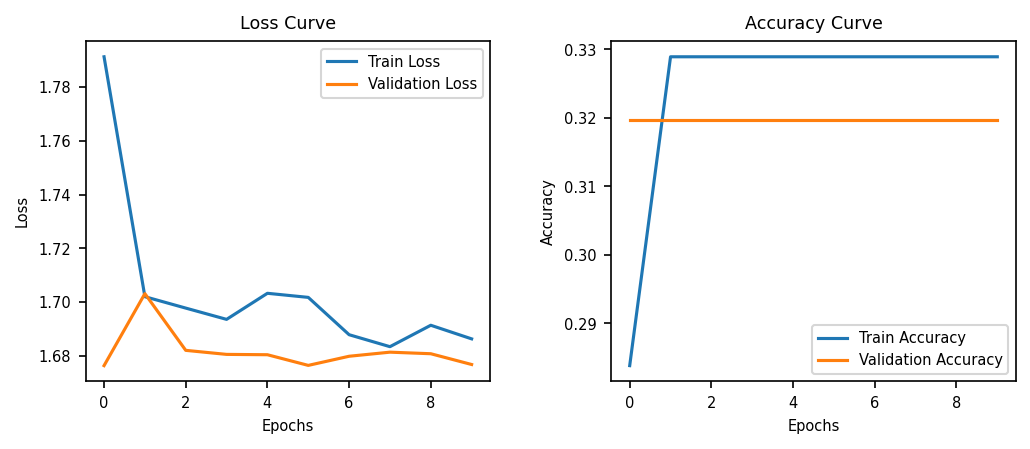

In [11]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 7}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=150)

ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Loss Curve')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy Curve')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.subplots_adjust(wspace=0.3)
plt.show()